## **<ins style="color:green">Normalization</ins>**
- Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distoring differences in the ranges of values or loosing information.
- A numeric value may have value and scale like 8kg. We have to remove scale and use value for machine learning.
- It may different scale available in a column like 8kg and 8000gm. We have to put then in a single scale.
### **Normalization Methods**:
1. **Minmax Scaling**
2. **Mean Normalization**
3. **Max Absolute Scaling**
4. **Robust Scaling**
5. ___See at the documentation of sklearn___

## <ins style="color:red">**Minmax Scaling**</ins>
- `Xi = (Xi-Xmin) / (Xmax - Xmin)`  : __range to [0, 1]__
- Compress the hole value in range of x=1 and y=1.

In [1]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/wine_data.csv")
df.sample(5)

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
121,2,12.42,4.43,2.73,26.5,102,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365
6,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
129,3,12.86,1.35,2.32,18.0,122,1.51,1.25,0.21,0.94,4.10,0.76,1.29,630
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
167,3,13.58,2.58,2.69,24.5,105,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750


In [3]:
df = df.iloc[:, [0, 1, 2]]

In [4]:
df.columns=['class_label', 'alcohol', 'malic_acid']

In [5]:
df.sample(5)

,class_label,alcohol,malic_acid
140,3,13.36,2.56
144,3,13.16,3.57
19,1,14.06,1.63
31,1,13.68,1.83
25,1,13.39,1.77


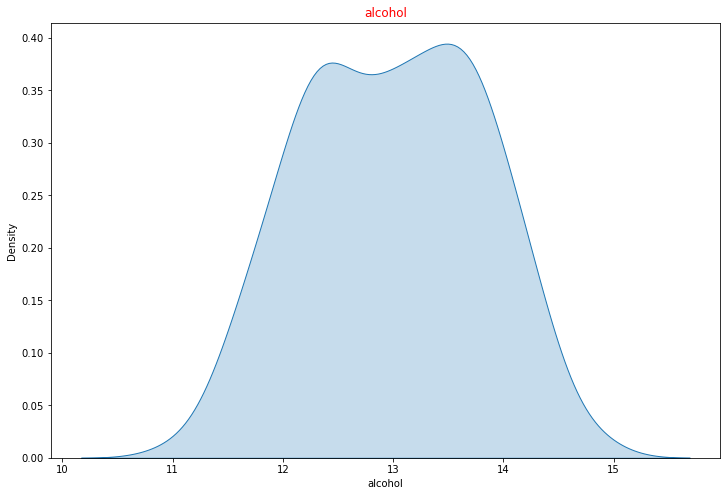

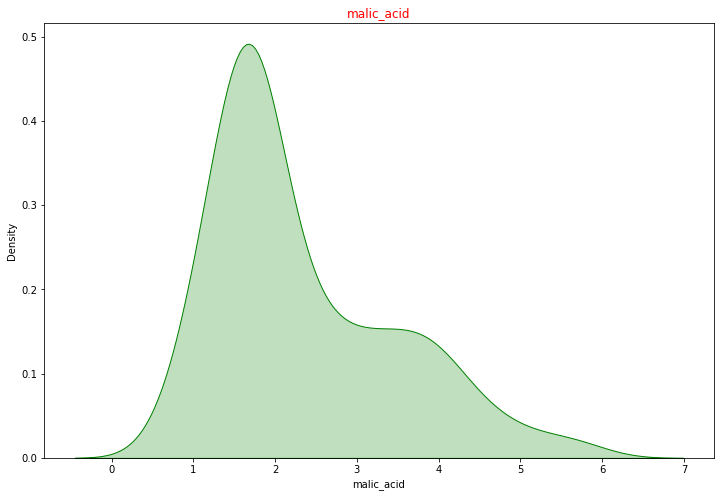

In [6]:
plt.figure(1, figsize=(12, 8))
sns.kdeplot(data=df, x='alcohol', fill=True)
plt.title("alcohol", color='r')
plt.show()

plt.figure(2, figsize=(12, 8))
sns.kdeplot(data=df, x='malic_acid', fill=True, color='g')
plt.title("malic_acid", color='r')
plt.show()

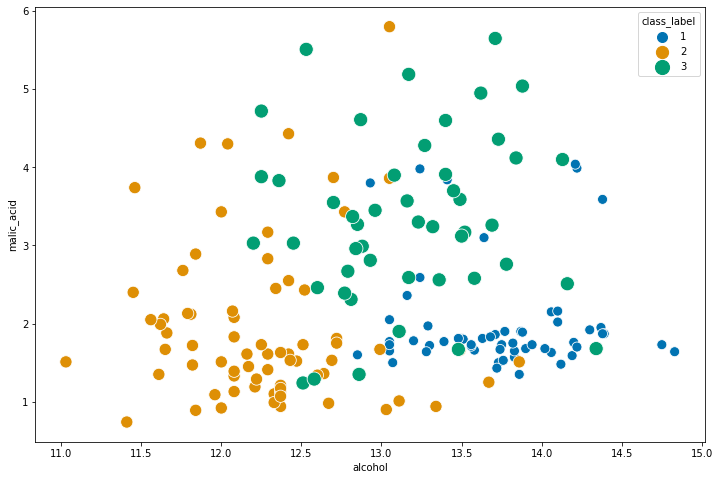

In [7]:
plt.figure(1, figsize=(12, 8))
sns.scatterplot(data=df, x='alcohol', y='malic_acid', hue='class_label', palette='colorblind', size='class_label', sizes=(100, 200))
plt.show()

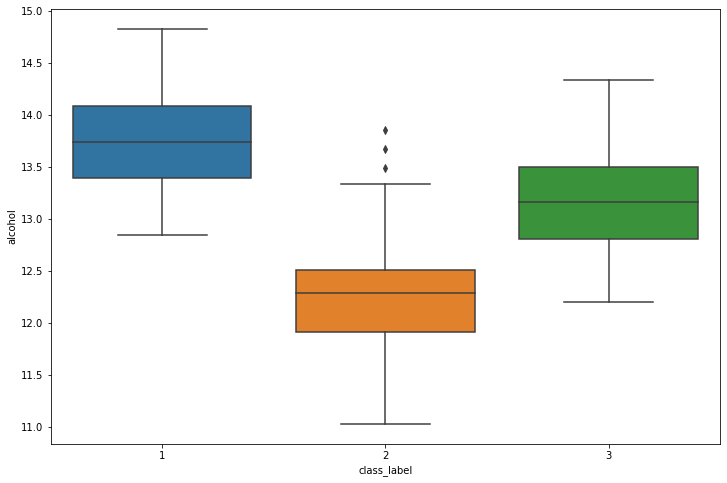

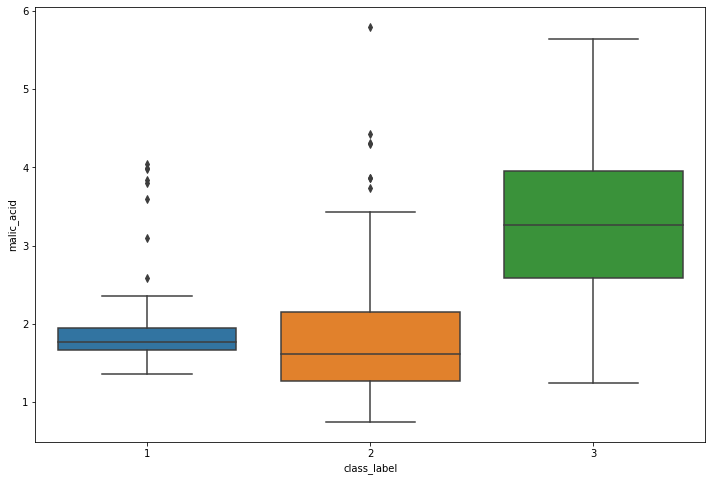

In [8]:
plt.figure(1, figsize=(12, 8))
sns.boxplot(data=df, y='alcohol', x='class_label')
plt.show()

plt.figure(2, figsize=(12, 8))
sns.boxplot(data=df, y='malic_acid', x='class_label')
plt.show()

In [9]:
X = df.iloc[:, [1, 2]]
Y = df.iloc[:, 0]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=7)
X_train.shape, X_test.shape

((123, 2), (54, 2))

### **MinMaxScaler**

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train) # get min and max

X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
type(X_train_scaled), type(X_test_scaled)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [12]:
np.round(X_train.describe(), 2)

,alcohol,malic_acid
count,123.00,123.00
mean,13.06,2.33
std,0.79,1.14
min,11.41,0.74
25%,12.37,1.62
50%,13.17,1.83
75%,13.70,3.01
max,14.83,5.65


In [13]:
np.round(X_train_scaled.describe(), 2)

,alcohol,malic_acid
count,123.00,123.00
mean,0.48,0.32
std,0.23,0.23
min,0.00,0.00
25%,0.28,0.18
50%,0.51,0.22
75%,0.67,0.46
max,1.00,1.00


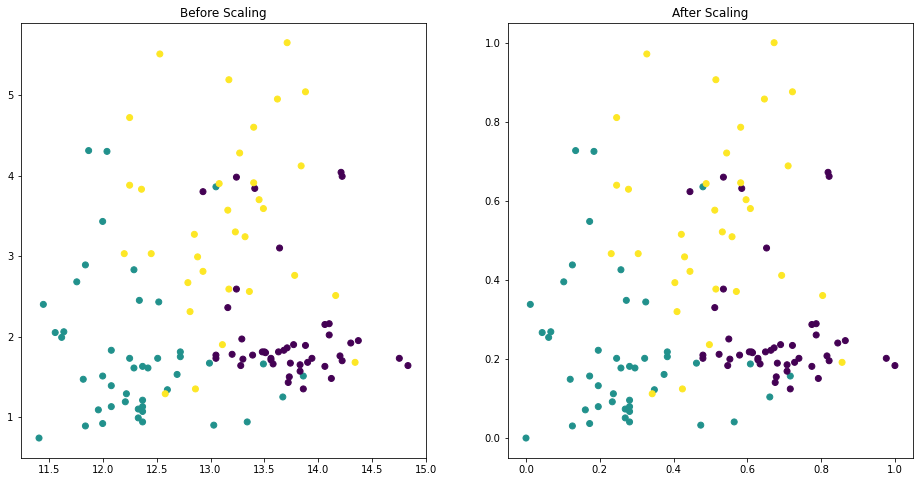

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 8))
ax1.scatter(X_train['alcohol'], X_train['malic_acid'], c=Y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['alcohol'], X_train_scaled['malic_acid'], c=Y_train)
ax2.set_title("After Scaling")
plt.show()

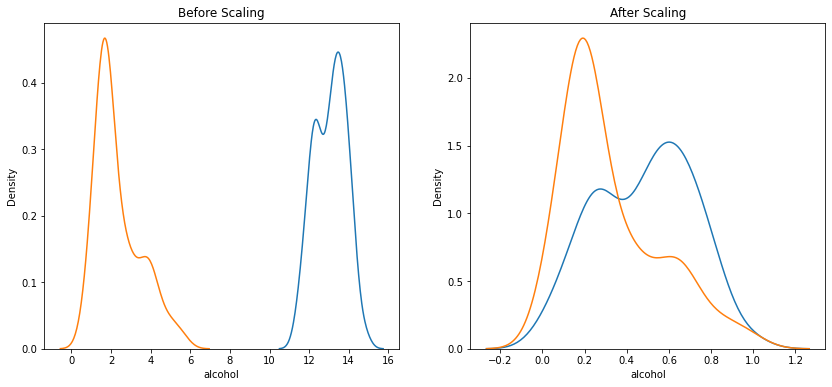

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6))
# before scaling
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['alcohol'], ax=ax1)
sns.kdeplot(X_train['malic_acid'], ax=ax1)

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['malic_acid'], ax=ax2)

plt.show()

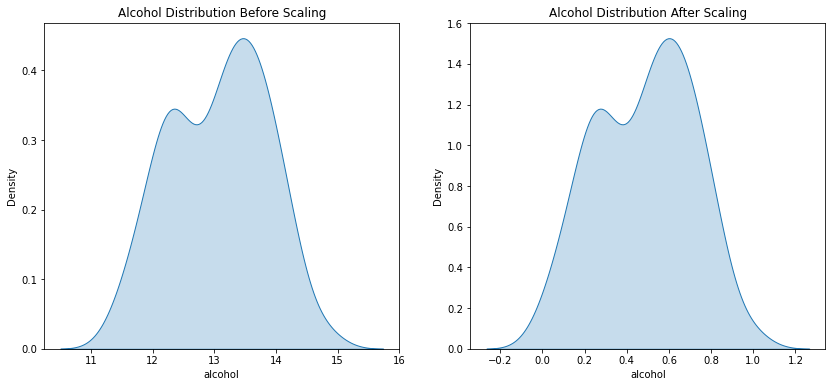

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['alcohol'], ax=ax1, fill=True)

# after scaling
ax2.set_title('Alcohol Distribution After Scaling')
sns.kdeplot(X_train_scaled['alcohol'], ax=ax2, fill=True)

plt.show()

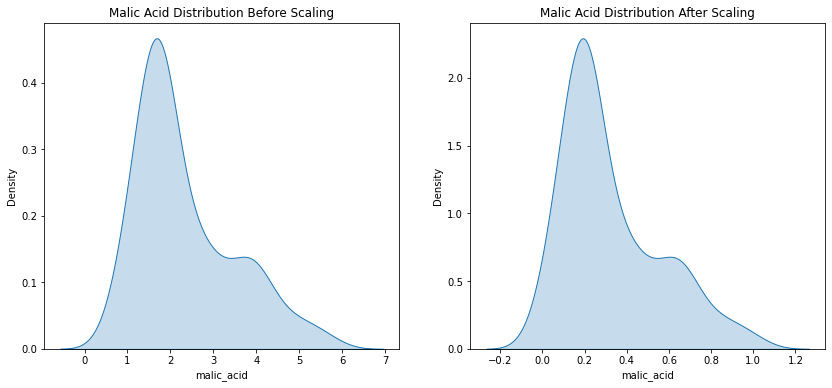

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6))

# before scaling
ax1.set_title('Malic Acid Distribution Before Scaling')
sns.kdeplot(X_train['malic_acid'], ax=ax1, fill=True)

# after scaling
ax2.set_title('Malic Acid Distribution After Scaling')
sns.kdeplot(X_train_scaled['malic_acid'], ax=ax2, fill=True)

plt.show()